In [0]:
from google.colab import files

In [59]:
#1 loading the data
uploaded= files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class (2).csv


In [0]:
import pandas as pd

In [61]:
#2 Creation of dataframe
df= pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [62]:
#3 Data preprocessing
df["salary"].fillna(0, inplace = True) 
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [63]:
df.shape

(215, 15)

In [64]:
#4.Data analysis
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [65]:
fname = df['status'].unique()
fname

array(['Placed', 'Not Placed'], dtype=object)

In [66]:
fsize = df.groupby(df['status'],sort= False).size()
fsize

status
Placed        148
Not Placed     67
dtype: int64

In [67]:
print(type(fsize))
print(type(fname))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


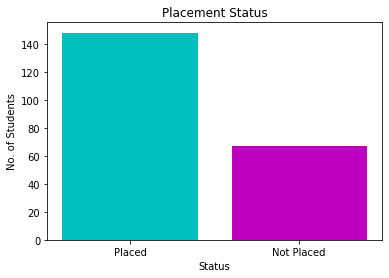

In [68]:
#5 Data visualization
import matplotlib.pyplot as plt
plt.bar(fname,fsize,color=['c','m'])
plt.title('Placement Status')
plt.xlabel('Status')
plt.ylabel('No. of Students')
plt.show()

In [0]:
#6 Dividing into input and output data
x=df.iloc[:,[2,4,7,10,12]].values
y=df.iloc[:,13].values


In [0]:
#7 Splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =0)

In [74]:
print(x_train.shape)
print(x_test.shape)

(161, 5)
(54, 5)


In [0]:
#8 Running KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=13,metric = 'euclidean')

In [76]:
#9 Fitting the model
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [0]:
#10 Predicting the output
y_predict =model.predict(x_test)


In [78]:
y_predict

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed'],
      dtype=object)

In [79]:
y_test

array(['Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed'], dtype=object)

In [80]:
#Example
model.predict([[68,53,0,0,0]])

array(['Not Placed'], dtype=object)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

77.77777777777779

In [0]:
from sklearn.metrics import confusion_matrix


In [83]:
confusion_matrix(y_test,y_predict) #for computing accuracy

array([[ 7, 10],
       [ 2, 35]])